In [0]:
pip install handyspark

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
from pyspark.sql.types import StructType,StructField,StringType,FloatType,TimestampType,IntegerType
from pyspark.sql.functions import col, expr, year, concat_ws, to_timestamp, round, array_contains, substring,to_date, percent_rank, percentile_approx,when

In [0]:
schema = StructType([
    StructField("_c0",IntegerType(),True),
    StructField("id",IntegerType(),True),
    StructField("Gender",StringType(),True),
    StructField("Customer Type",StringType(),True),
    StructField("Age",IntegerType(),True),
    StructField("Type of Travel",StringType(),True),
    StructField("Class",StringType(),True),
    StructField("Flight Distance",StringType(),True),
    StructField("Inflight wifi service",IntegerType(),True),
    StructField("Departure/Arrival time convenient",IntegerType(),True),
    StructField("Ease of Online booking",IntegerType(),True),
    StructField("Gate location",IntegerType(),True),
    StructField("Food and drink",IntegerType(),True),
    StructField("Online boarding",IntegerType(),True),
    StructField("Seat comfort",IntegerType(),True),
    StructField("Inflight entertainment",IntegerType(),True),
    StructField("On-board service",IntegerType(),True),
    StructField("Leg room service",IntegerType(),True),
    StructField("Baggage handling",IntegerType(),True),
    StructField("Checkin service",IntegerType(),True),
    StructField("Inflight service",IntegerType(),True),
    StructField("Cleanliness",IntegerType(),True),
    StructField("Departure Delay in Minutes",IntegerType(),True),
    StructField("Arrival Delay in Minutes",FloatType(),True),
    StructField("satisfaction",StringType(),True),
 ])

# Fase 1: Preparación del modelo de ML de Regresión Logística.
Reutilizar el modelo de Regresión Logística planteado en el Sprint 3 como paso inicial para la fase de streaming.

In [0]:
df=spark.read.format("csv").option("infer Schema","true").option("header","true").schema(schema).load("/FileStore/tables/encuesta_aerolinea.csv")

In [0]:
df=df.na.drop()

In [0]:
nuevo_dataframe = df.withColumn("satisfaction_binary", when(col("satisfaction") == "satisfied", 1).otherwise(0))

In [0]:
nuevo_dataframe.display()

_c0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfaction_binary
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,1
5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied,0
6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,2,2,2,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied,0
7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,5,5,5,5,5,5,5,4,5,4,4,0.0,satisfied,1
8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,4,3,3,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied,0
9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,2,3,3,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied,0


In [0]:
datause = nuevo_dataframe.select("Gender","Age","Class", "Inflight wifi service",  "Departure/Arrival time convenient", "Ease of Online booking", "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", "Baggage handling", "Checkin service", "Inflight service", "Cleanliness", "satisfaction","satisfaction_binary")

In [0]:
datause.display()

Gender,Age,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,satisfaction_binary
Male,13,Eco Plus,3,4,3,1,5,3,5,5,4,3,4,4,5,5,neutral or dissatisfied,0
Male,25,Business,3,2,3,3,1,3,1,1,1,5,3,1,4,1,neutral or dissatisfied,0
Female,26,Business,2,2,2,2,5,5,5,5,4,3,4,4,4,5,satisfied,1
Female,25,Business,2,5,5,5,2,2,2,2,2,5,3,1,4,2,neutral or dissatisfied,0
Male,61,Business,3,3,3,3,4,5,5,3,3,4,4,3,3,3,satisfied,1
Female,26,Eco,3,4,2,1,1,2,1,1,3,4,4,4,4,1,neutral or dissatisfied,0
Male,47,Eco,2,4,2,3,2,2,2,2,3,3,4,3,5,2,neutral or dissatisfied,0
Female,52,Business,4,3,4,4,5,5,5,5,5,5,5,4,5,4,satisfied,1
Female,41,Business,1,2,2,2,4,3,3,1,1,2,1,4,1,2,neutral or dissatisfied,0
Male,20,Eco,3,3,3,4,2,3,3,2,2,3,4,4,3,2,neutral or dissatisfied,0


In [0]:
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,OneHotEncoder,StringIndexer)
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [0]:
gender_indexer = StringIndexer(inputCol="Gender",outputCol = "GenderIndex")
gender_encoder = OneHotEncoder(inputCol="GenderIndex",outputCol="GenderVec")
satisfaction_indexer = StringIndexer(inputCol="satisfaction",outputCol="satisfactionIndex")
satisfaction_encoder = OneHotEncoder(inputCol="satisfactionIndex",outputCol="satisfactionVec")
Class_indexer = StringIndexer(inputCol="Class",outputCol="ClassIndex")
Class_encoder = OneHotEncoder(inputCol="ClassIndex",outputCol="ClassVec")

In [0]:
assembler = VectorAssembler(inputCols = ["GenderVec","Age","ClassVec", "Inflight wifi service",  "Departure/Arrival time convenient", "Ease of Online booking", "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", "Baggage handling", "Checkin service", "Inflight service", "Cleanliness"],outputCol= "features")

In [0]:
lr_usedf = LogisticRegression(featuresCol='features',labelCol='satisfaction_binary')

In [0]:
pipeline = Pipeline(stages=[gender_indexer,satisfaction_indexer,Class_indexer,gender_encoder,satisfaction_encoder,Class_encoder,assembler,lr_usedf])

In [0]:
train_df_data,test_df_data = datause.randomSplit([0.8,.2])

In [0]:
fit_model = pipeline.fit(train_df_data)

In [0]:
results = fit_model.transform(test_df_data)

In [0]:
eval_model=BinaryClassificationEvaluator(rawPredictionCol='prediction',labelCol='satisfaction_binary')

In [0]:
results.select('satisfaction_binary','probability','prediction').show(20,truncate=False)

+-------------------+-----------------------------------------+----------+
|satisfaction_binary|probability                              |prediction|
+-------------------+-----------------------------------------+----------+
|1                  |[0.998003601052295,0.0019963989477049804]|0.0       |
|0                  |[0.9601836804667994,0.03981631953320064] |0.0       |
|0                  |[0.9636872000108462,0.03631279998915382] |0.0       |
|0                  |[0.9861354839202916,0.0138645160797084]  |0.0       |
|0                  |[0.9004852745442041,0.09951472545579587] |0.0       |
|0                  |[0.9535022674234399,0.04649773257656009] |0.0       |
|0                  |[0.9647330661942174,0.03526693380578261] |0.0       |
|0                  |[0.9137050023621145,0.0862949976378855]  |0.0       |
|0                  |[0.7743759153893891,0.2256240846106109]  |0.0       |
|0                  |[0.7616732169700272,0.2383267830299728]  |0.0       |
|0                  |[0.9

/databricks/spark/python/pyspark/sql/context.py:134: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(
/databricks/spark/python/pyspark/sql/context.py:134: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(
Out[19]: <AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

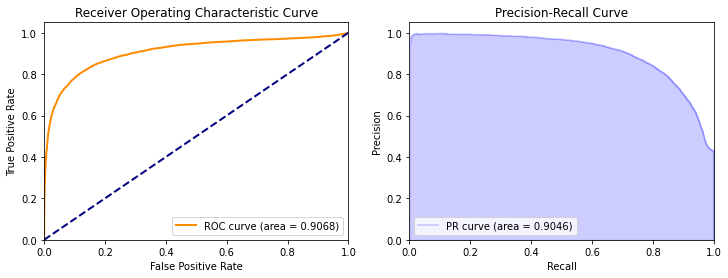

In [0]:
from handyspark import*
from matplotlib import pyplot as plt
bcm = BinaryClassificationMetrics(results,scoreCol='probability',labelCol='satisfaction_binary')
fig,axs = plt.subplots(1,2,figsize=(12,4))
bcm.plot_roc_curve(ax=axs[0])
bcm.plot_pr_curve(ax=axs[1])

# Fase 2: Preparación de los datos
El fichero original encuesta_aerolinea.csv debe repartirse entre 20 partes iguales utilizando el método repartition() y las partes del fichero deberán guardarse en un un directorio que constituirá la fuente del stream de datos.

El directorio de fuente del stream debe ser borrado completamente con cada ejecución del stream para que la simulación funcione correctamente. El directorio de origen de los datos debe ser siempre el siguiente: dbfs:/FileStore/tables/proyecto/streaming/

In [0]:
#se usa el daraframe "original", no el de la fuente por la modificacion de la columna satisfaction_binary la cual esta ausente en este archivo
#se uso el modificado porque no funciono con el tratado 
datause.display()

Gender,Age,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,satisfaction_binary
Male,13,Eco Plus,3,4,3,1,5,3,5,5,4,3,4,4,5,5,neutral or dissatisfied,0
Male,25,Business,3,2,3,3,1,3,1,1,1,5,3,1,4,1,neutral or dissatisfied,0
Female,26,Business,2,2,2,2,5,5,5,5,4,3,4,4,4,5,satisfied,1
Female,25,Business,2,5,5,5,2,2,2,2,2,5,3,1,4,2,neutral or dissatisfied,0
Male,61,Business,3,3,3,3,4,5,5,3,3,4,4,3,3,3,satisfied,1
Female,26,Eco,3,4,2,1,1,2,1,1,3,4,4,4,4,1,neutral or dissatisfied,0
Male,47,Eco,2,4,2,3,2,2,2,2,3,3,4,3,5,2,neutral or dissatisfied,0
Female,52,Business,4,3,4,4,5,5,5,5,5,5,5,4,5,4,satisfied,1
Female,41,Business,1,2,2,2,4,3,3,1,1,2,1,4,1,2,neutral or dissatisfied,0
Male,20,Eco,3,3,3,4,2,3,3,2,2,3,4,4,3,2,neutral or dissatisfied,0


In [0]:
datause.printSchema()

root
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Class: string (nullable = true)
 |-- Inflight wifi service: integer (nullable = true)
 |-- Departure/Arrival time convenient: integer (nullable = true)
 |-- Ease of Online booking: integer (nullable = true)
 |-- Gate location: integer (nullable = true)
 |-- Food and drink: integer (nullable = true)
 |-- Online boarding: integer (nullable = true)
 |-- Seat comfort: integer (nullable = true)
 |-- Inflight entertainment: integer (nullable = true)
 |-- On-board service: integer (nullable = true)
 |-- Leg room service: integer (nullable = true)
 |-- Baggage handling: integer (nullable = true)
 |-- Checkin service: integer (nullable = true)
 |-- Inflight service: integer (nullable = true)
 |-- Cleanliness: integer (nullable = true)
 |-- satisfaction: string (nullable = true)
 |-- satisfaction_binary: integer (nullable = false)



In [0]:
# Vi este en internet para hacer lo mismo pero leyende los datos con consultas sql, asumo que mabos seran iguales.
datause.repartition(20).write.format("parquet").mode("overwrite").save("/FileStore/tables/proyecto/streaming/")

In [0]:
datause3 = datause.repartition(20).write.format("csv").option("header",True).save("/FileStore/tables/proyecto3/streaming/")

In [0]:
# %sql
# select count(*) from parquet.`/FileStore/tables/proyecto/streaming/part-00000-tid-3981340521815204744-0493a414-61ca-4e79-b7a1-80092ddc5c45-371-1-c000.snappy.parquet`



In [0]:
# %sql
# select count(*) from parquet.`/FileStore/tables/proyecto/streaming/part-00001-tid-2240285503188974759-fa44f31e-a5dc-4886-9bcc-c51b03c867c5-164-1-c000.snappy.parquet`


In [0]:
# %sql
# select count(*) from parquet.`/FileStore/tables/proyecto/streaming/part-00002-tid-2240285503188974759-fa44f31e-a5dc-4886-9bcc-c51b03c867c5-165-1-c000.snappy.parquet`

In [0]:
# %sql
# select count(*) from parquet.`/FileStore/tables/proyecto/streaming/part-00002-tid-2240285503188974759-fa44f31e-a5dc-4886-9bcc-c51b03c867c5-165-1-c000.snappy.parquet`

In [0]:
# %sql
# select count(*) from parquet.`/FileStore/tables/proyecto/streaming/part-00015-tid-2240285503188974759-fa44f31e-a5dc-4886-9bcc-c51b03c867c5-178-1-c000.snappy.parquet`


In [0]:
# %sql
# select count(*) from parquet.`/FileStore/tables/proyecto/streaming/part-00019-tid-2240285503188974759-fa44f31e-a5dc-4886-9bcc-c51b03c867c5-182-1-c000.snappy.parquet`

Como se pueden observar en las celdas anteriores, la particion de estos datos parecer ser casi excata entre las 20 particiones, pues varia entre 1, desconozco la razon de esto (tomando de ejemplo solo 6) dejo comenmtado los codigos porque cambia la ruta.

# Fase 3: Creación de la fuente de streaming
Se deberá crear la fuente de datos para el stream con el método readStream() y los parámetros requeridos para su correcta implementación.

Se deberá aplicar el método transform() sobre el modelo generado pasando como parámetro el stream de fuente previamente creado y visualizar el stream de datos resultante con el  método display().

In [0]:
sourceStream = spark.readStream.format("csv").option("header",True).schema(schema).option("ignoreLeadingWhiteSpace",True).option("mode","dropMalformed").option("maxFilesPerTriger",1).load("/FileStore/tables/proyecto/streaming/").withColumnRenamed("output","label")

In [0]:
# con satisfaction binary no me da 
streaming = fit_model.transform(sourceStream).select('probability','prediction')
display(streaming)

# Fase 4: Implementación de una Consulta adicional

Se creará una segunda consulta (query) sobre el stream resultante del paso anterior a partir del método writeStream() con un modo de salida “append”, formato “memory” y nombre “encuestaClassification”.

In [0]:
query = (streaming.writeStream.outputMode("append").format("memory").queryName("encuestaClassification").start())

In [0]:
%sql
select * from encuestaClassification

probability,prediction


# Fase 5: Evaluación del Modelo en streaming

Crear un objeto evaluador del tipo MulticlassClassificationEvaluator para obtener la métrica “accuracy”.

A partir de la consulta “encuestaClassification” generar un Dataframe utilizando spark.sql() y pasar este Dataframe resultante como parámetro al evaluador utilizando el método evaluate(). 

Finalmente, imprimir la métrica de “accuracy” resultante para el modelo.

In [0]:
encuestaClassification